1. Опишите теоретическую модель k-средних.
2. Напишите следующий год: сгенерируйте данные в виде набора точек по нескольким классам; выполните классификацию; оцените точность, визуализируйте результат.
3. Опишите метрику для проверки качества алгоритмов регрессии.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [9]:
def plot_decision_boundary(X, y, model, title=""):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Границы сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_bold)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

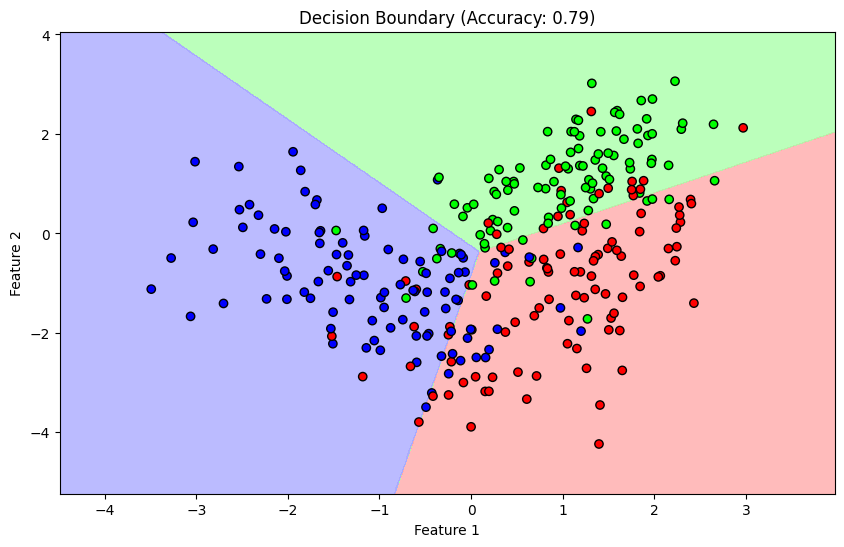

0.7888888888888889


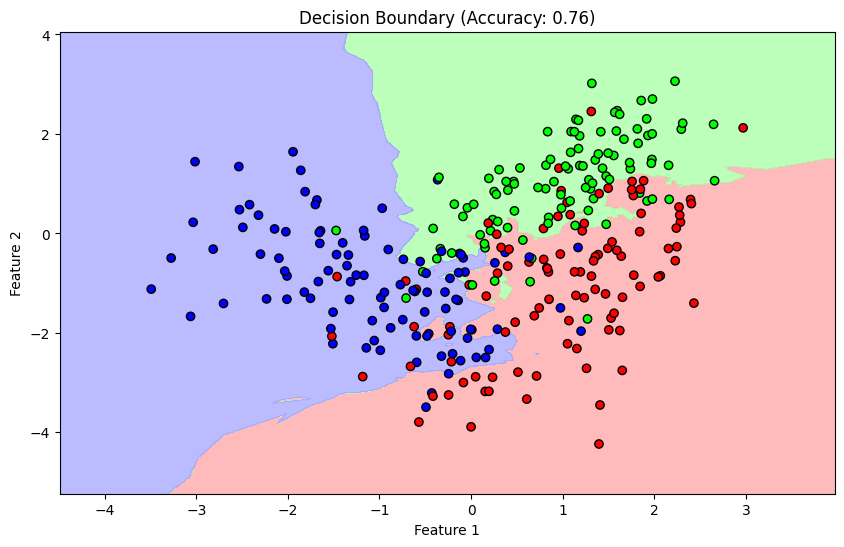

0.7555555555555555


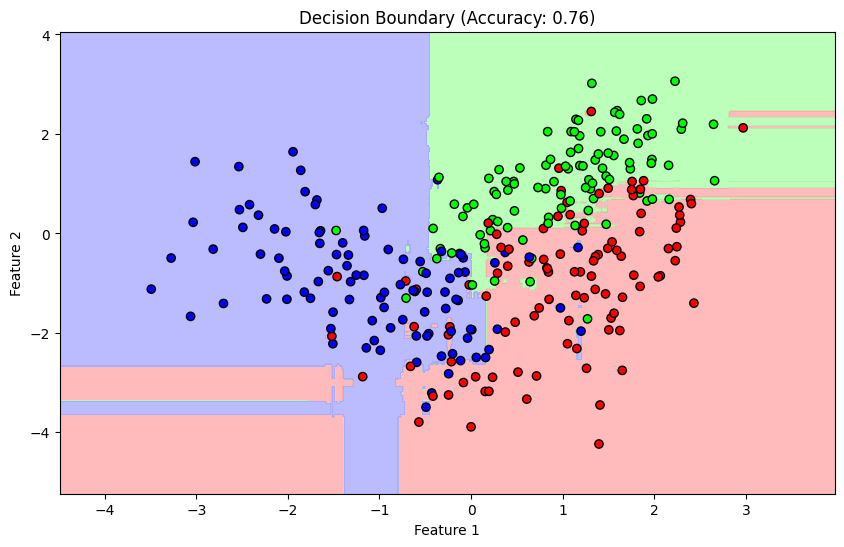

0.7555555555555555


In [18]:
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_classes=3, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=52
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=52)

models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5, n_jobs=-2), RandomForestClassifier(n_estimators=500, n_jobs=-2)]


for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    plot_decision_boundary(X, y, model, title=f"Decision Boundary (Accuracy: {accuracy:.2f})")

    print(accuracy)


k-средних — это алгоритм кластеризации, который группирует n объектов (данные) в k кластеров на основе их сходства. Основная цель — минимизация внутрикластерного расхождения, то есть минимизация суммарного квадратичного расстояния между объектами и центрами их кластеров.

Этапы алгоритма k-средних

Определение количества кластеров (k)

Число k задаётся пользователем. Оно зависит от предположений или может быть выбрано эмпирически (например, методом "локтя").

Назначение объектов кластерам:
Каждая точка данных назначается ближайшему центру кластера на основе выбранной метрики расстояния (обычно Евклидово расстояние)
Обновление центров кластеров:
Центр каждого кластера пересчитывается как среднее всех точек, принадлежащих этому кластеру

Повторение шагов 3 и 4
Процесс повторяется до тех пор, пока центры кластеров не перестанут изменяться (или изменения станут незначительными), либо не будет достигнуто максимальное число итераций.



MSE
MAE
MAPE
R2
RMSE

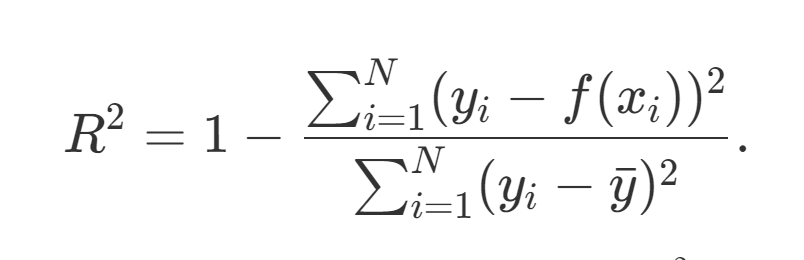